# Menyiapkan dataset dari kaggle dan import

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'yenugularajeev/rice-disease'

 70% 17.0M/24.2M [00:00<00:00, 70.3MB/s]
100% 24.2M/24.2M [00:00<00:00, 88.0MB/s]


In [ ]:
import zipfile

In [ ]:
dataset_zip = zipfile.ZipFile('rice-disease.zip', 'r')

dataset_zip.extractall()

dataset_zip.close()

In [ ]:
#import fungsi umum
import io
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#import modul pemrosesan gambar
from PIL import Image
import cv2
from skimage import color, img_as_ubyte, io as skimage_io, measure
from skimage.color import rgb2gray
from skimage.feature import hog, local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label
from skimage.transform import resize
from skimage.io import imread

#import modul machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import modul eksternal
from google.colab import files
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import zipfile
import shutil
import warnings

#menyembunyikan peringatan
warnings.filterwarnings('ignore')

#untuk visualisasi matplotlib
%matplotlib inline

# **EDA**

In [ ]:
#memeriksa isi direktori rice-disease
print(os.listdir('rice-disease'))

['leaf_scald', 'leaf_blast', 'brown_spot', 'healthy', 'narrow_brown_spot', 'bacterial_leaf_blight']


In [ ]:
def count_images_in_each_class(rice_disease):
    classes = os.listdir(rice_disease)
    for class_name in classes:
        class_path = os.path.join(rice_disease, class_name)
        num_images = len(os.listdir(class_path))
        print(f"Jumlah gambar di kelas {class_name}: {num_images}")

#menghitung jumlah gambar di setiap kelas
count_images_in_each_class('rice-disease')

Jumlah gambar di kelas leaf_scald: 350
Jumlah gambar di kelas leaf_blast: 350
Jumlah gambar di kelas brown_spot: 350
Jumlah gambar di kelas healthy: 350
Jumlah gambar di kelas narrow_brown_spot: 350
Jumlah gambar di kelas bacterial_leaf_blight: 350


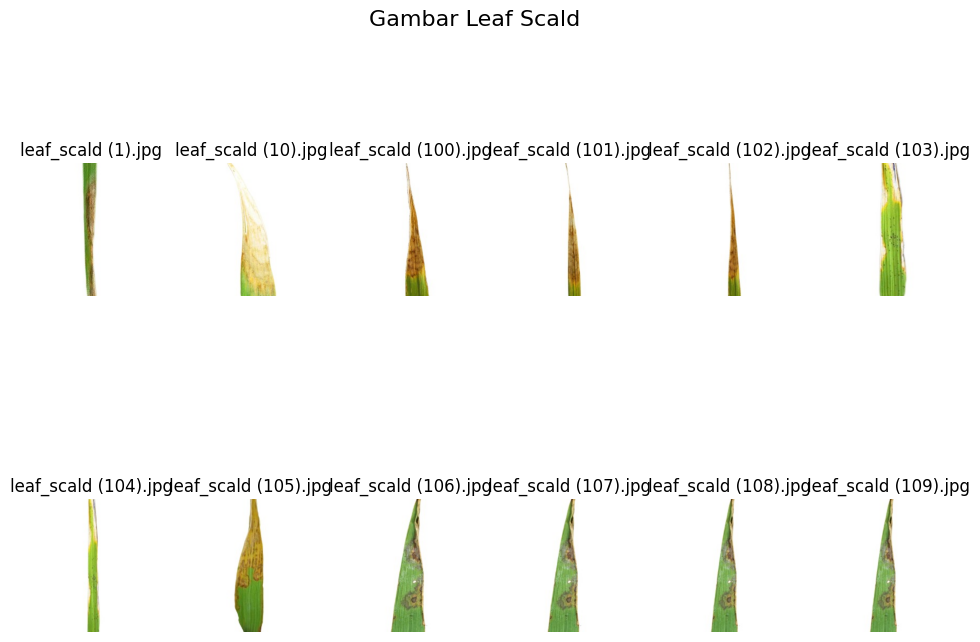

In [ ]:
def show_sample_images(class_dir):
    class_images = sorted(os.listdir(class_dir))[:12]  #untuk mengurutkan gambar berdasarkan nama file
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(class_images, 1):
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        plt.subplot(2, 6, i)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.suptitle('Gambar Leaf Scald', fontsize=16)
    plt.show()

#untuk menampilkan sampel gambar dari setiap subdirektori
show_sample_images('rice-disease/leaf_scald')

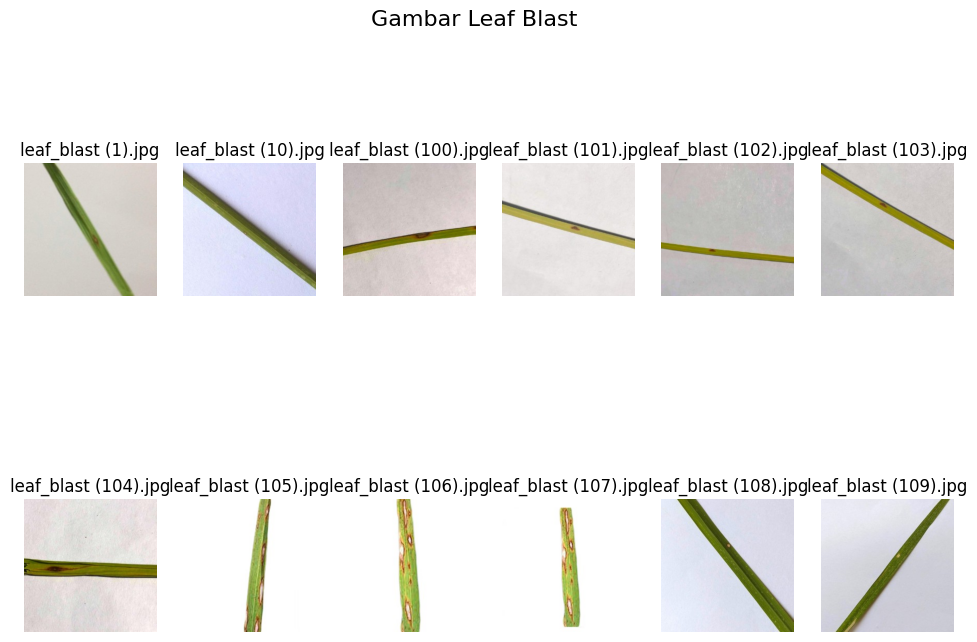

In [ ]:
def show_sample_images(class_dir):
    class_images = sorted(os.listdir(class_dir))[:12]  #untuk mengurutkan gambar berdasarkan nama file
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(class_images, 1):
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        plt.subplot(2, 6, i)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.suptitle('Gambar Leaf Blast', fontsize=16)
    plt.show()

#untuk menampilkan sampel gambar dari setiap subdirektori
show_sample_images('rice-disease/leaf_blast')

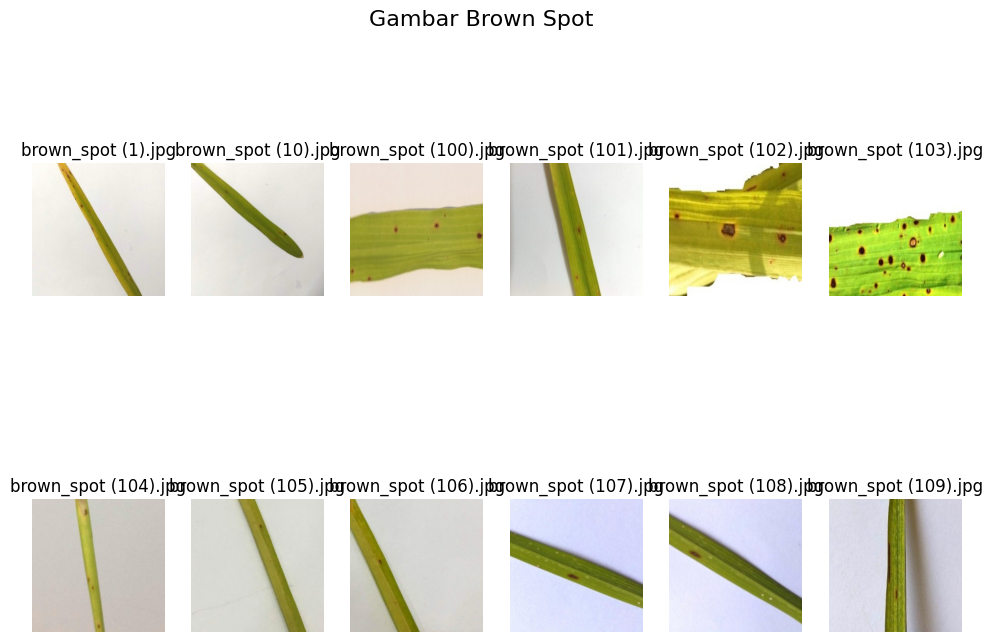

In [ ]:
def show_sample_images(class_dir):
    class_images = sorted(os.listdir(class_dir))[:12]  #untuk mengurutkan gambar berdasarkan nama file
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(class_images, 1):
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        plt.subplot(2, 6, i)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.suptitle('Gambar Brown Spot', fontsize=16)
    plt.show()

#untuk menampilkan sampel gambar dari setiap subdirektori
show_sample_images('rice-disease/brown_spot')

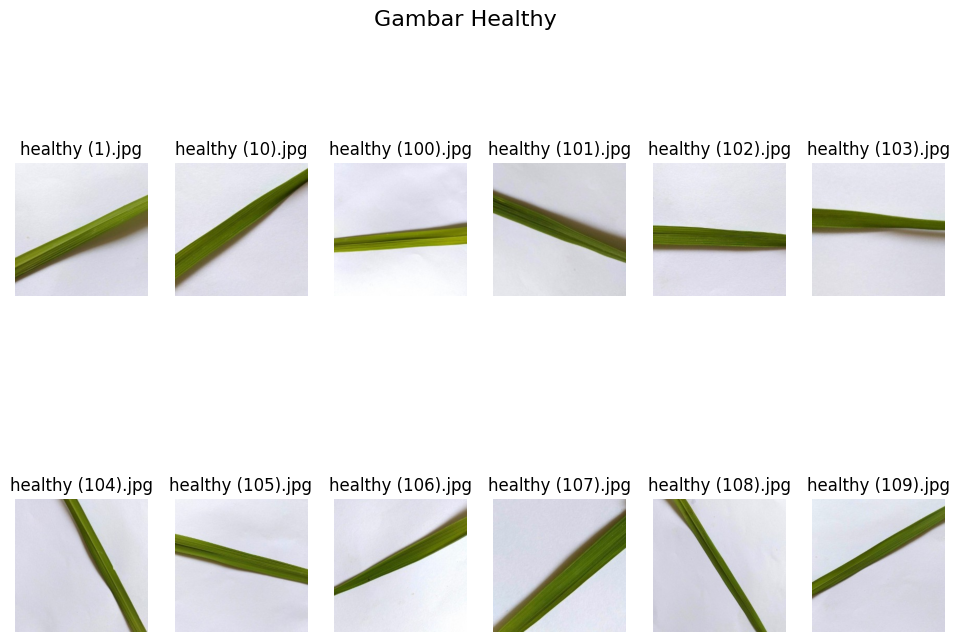

In [ ]:
def show_sample_images(class_dir):
    class_images = sorted(os.listdir(class_dir))[:12]  #untuk mengurutkan gambar berdasarkan nama file
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(class_images, 1):
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        plt.subplot(2, 6, i)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.suptitle('Gambar Healthy', fontsize=16)
    plt.show()

#untuk menampilkan sampel gambar dari setiap subdirektori
show_sample_images('rice-disease/healthy')

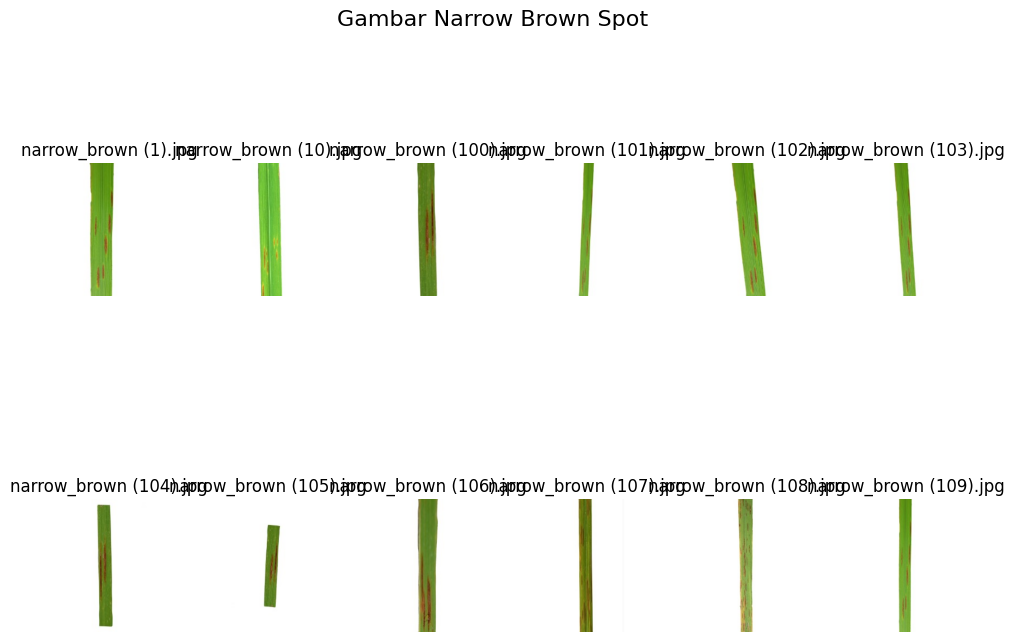

In [ ]:
def show_sample_images(class_dir):
    class_images = sorted(os.listdir(class_dir))[:12]  #untuk mengurutkan gambar berdasarkan nama file
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(class_images, 1):
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        plt.subplot(2, 6, i)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.suptitle('Gambar Narrow Brown Spot', fontsize=16)
    plt.show()

#untuk menampilkan sampel gambar dari setiap subdirektori
show_sample_images('rice-disease/narrow_brown_spot')

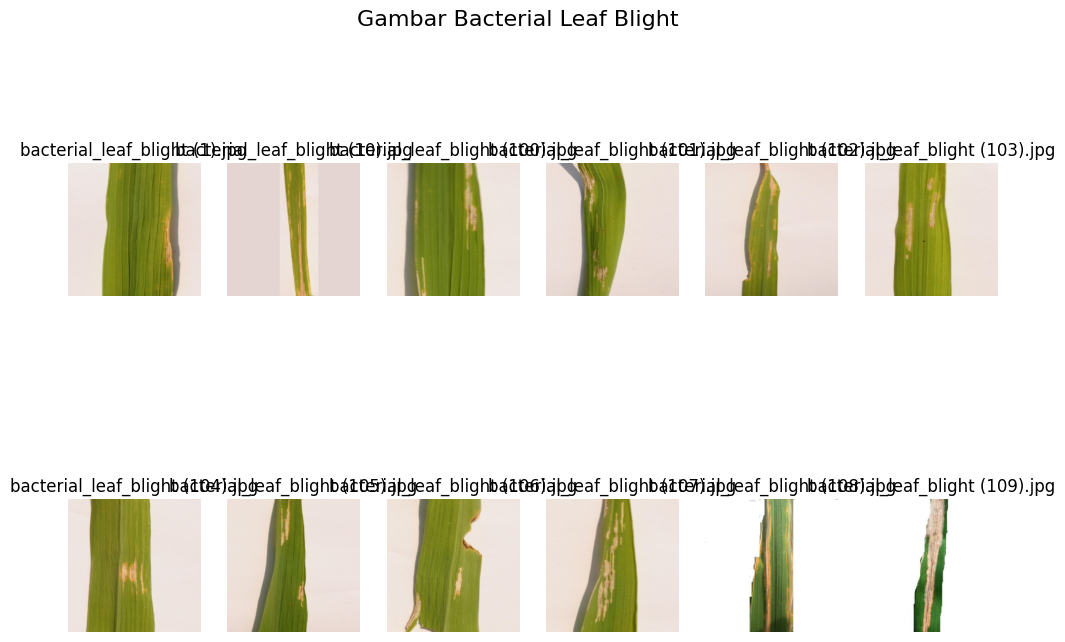

In [ ]:
def show_sample_images(class_dir):
    class_images = sorted(os.listdir(class_dir))[:12]  #untuk mengurutkan gambar berdasarkan nama file
    plt.figure(figsize=(12, 8))
    for i, image_name in enumerate(class_images, 1):
        image_path = os.path.join(class_dir, image_name)
        img = plt.imread(image_path)
        plt.subplot(2, 6, i)
        plt.imshow(img)
        plt.title(image_name)
        plt.axis('off')
    plt.suptitle('Gambar Bacterial Leaf Blight', fontsize=16)
    plt.show()

#untuk menampilkan sampel gambar dari setiap subdirektori
show_sample_images('rice-disease/bacterial_leaf_blight')

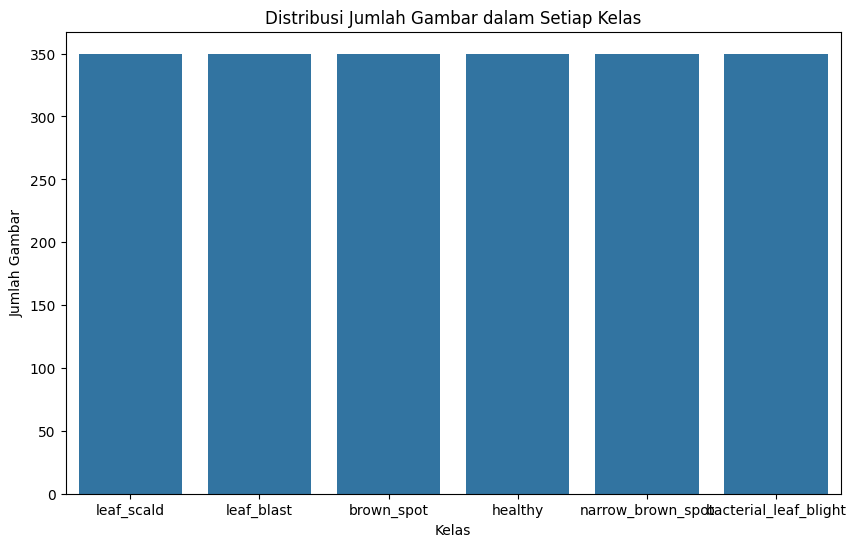

In [ ]:
def plot_class_distribution(rice_disease):

    # Membaca daftar kelas dalam direktori
    classes = os.listdir(rice_disease)

    # Menghitung jumlah gambar dalam setiap kelas
    num_images_per_class = [len(os.listdir(os.path.join(rice_disease, class_name))) for class_name in classes]

    # Membuat plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=classes, y=num_images_per_class)
    plt.title('Distribusi Jumlah Gambar dalam Setiap Kelas')
    plt.xlabel('Kelas')
    plt.ylabel('Jumlah Gambar')
    plt.show()

# Memanggil fungsi dengan path yang benar
plot_class_distribution('/content/rice-disease')

# **Preprocessing**

# Resize Gambar

In [ ]:
#path direktori gambar
directory = 'rice-disease'

#dimensi (lebar, tinggi)
new_size = (256, 256)

#fungsi untuk mengubah ukuran gambar
def resize_images_in_directory(directory, new_size):
    classes = os.listdir(directory)
    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            image_files = os.listdir(class_path)
            for image_file in image_files:
                image_path = os.path.join(class_path, image_file)
                img = cv2.imread(image_path)
                if img is not None:  #memastikan gambar dibaca dengan benar
                    resized_img = cv2.resize(img, new_size)
                    cv2.imwrite(image_path, resized_img)


# Membagi data training dan validation

In [ ]:
dataset_dir ='dataset'

train_dir = os.path.join(dataset_dir, 'train') #'dataset/train'
val_dir = os.path.join(dataset_dir, 'val') #'dataset/validation'

In [ ]:
#membuat direktori untuk data latih dan uji
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [ ]:
#membuat direktori untuk kategori yang berbeda dalam data latih dan uji
categories = ['leaf_scald', 'leaf_blast', 'brown_spot', 'healthy', 'narrow_brown_spot', 'bacterial_leaf_blight']

In [ ]:
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)

In [ ]:
#menentukan proporsi data latih dan uji
training_portion = 0.7

#memindahkan gambar ke direktori data latih dan uji
for category in categories:
    files = os.listdir(f'rice-disease/{category}')
    train_length = int(training_portion * len(files))
    file_counter = 0

    for file in files:
        src = os.path.join(f'rice-disease/{category}', file)
        if file_counter < train_length:
            dest = os.path.join(train_dir, category)
        else:
            dest = os.path.join(val_dir, category)

        shutil.move(src, dest)
        file_counter += 1

    print(f'Banyak Data {category} Untuk Training: {len(os.listdir(os.path.join(train_dir, category)))} DATA')
    print(f'Banyak Data {category} Untuk Validation: {len(os.listdir(os.path.join(val_dir, category)))} DATA')

Banyak Data leaf_scald Untuk Training: 244 DATA
Banyak Data leaf_scald Untuk Validation: 106 DATA
Banyak Data leaf_blast Untuk Training: 244 DATA
Banyak Data leaf_blast Untuk Validation: 106 DATA
Banyak Data brown_spot Untuk Training: 244 DATA
Banyak Data brown_spot Untuk Validation: 106 DATA
Banyak Data healthy Untuk Training: 244 DATA
Banyak Data healthy Untuk Validation: 106 DATA
Banyak Data narrow_brown_spot Untuk Training: 244 DATA
Banyak Data narrow_brown_spot Untuk Validation: 106 DATA
Banyak Data bacterial_leaf_blight Untuk Training: 244 DATA
Banyak Data bacterial_leaf_blight Untuk Validation: 106 DATA


# Ekstraksi Fitur

Ekstraksi fitur tepi menggunakan canny

In [ ]:
#fungsi untuk ekstraksi fitur tepi
def extract_edge_features(image):
    #mengkonversi gambar ke skala abu-abu
    gray_image = rgb2gray(image)
    #mendeteksi tepi menggunakan Canny edge detection
    edges = cv2.Canny(img_as_ubyte(gray_image), 100, 200)
    #menghitung fitur HOG
    hog_features = hog(edges, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    return hog_features

Ekstraksi fitur tekstur menggunakan LBP

In [ ]:
#fungsi untuk ekstraksi fitur tekstur menggunakan LBP
def extract_lbp_features(image):
    #mengkonversi gambar ke skala abu-abu
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #parameter LBP
    radius = 1
    n_points = 8 * radius
    #menghitung LBP menggunakan skimage.feature.local_binary_pattern
    lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')
    #menghitung histogram LBP
    lbp_hist, _ = np.histogram(lbp, bins=256, range=(0, 256))
    #normalisasi histogram LBP
    lbp_hist = lbp_hist / np.sum(lbp_hist)
    return lbp_hist

Ekstraksi fitur warna menggunakan HSV

In [ ]:
#fungsi untuk ekstraksi fitur warna menggunakan model warna HSV
def extract_hsv_features(image):
    #mengkonversi gambar ke ruang warna HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #daftar histogram untuk setiap saluran HSV
    histograms = []
    #hitung histogram warna untuk setiap saluran
    for i in range(3):
        hist = cv2.calcHist([hsv_image], [i], None, [256], [0, 256])
        histograms.append(hist.flatten())
    #menggabungkan histogram saluran warna
    histograms = np.concatenate(histograms)
    return histograms

Ekstraksi fitur dari gambar

In [ ]:
#fungsi untuk ekstraksi fitur dari gambar
def extract_features(image):
    #ekstraksi fitur LBP
    lbp_features = extract_lbp_features(image)
    #ekstraksi fitur warna menggunakan model warna HSV
    hsv_features = extract_hsv_features(image)
    #ekstraksi fitur tepi
    edge_features = extract_edge_features(image)

    #menggabungkan semua fitur menjadi satu array
    all_features = np.concatenate((lbp_features, hsv_features, edge_features))
    return all_features

In [ ]:
#fungsi untuk memproses gambar dan mengekstraksi fitur
def process_images(images):
    features = []
    for image in images:
        #ekstraksi fitur dari gambar
        all_features = extract_features(image)
        features.append(all_features)

    features = np.array(features)
    #normalisasi fitur
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    return normalized_features

# Pelatihan

In [ ]:
#fungsi untuk memuat gambar dan label
def load_images_and_labels(data_dir):
    images = []
    labels = []
    categories = os.listdir(data_dir)
    for category in categories:
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            files = os.listdir(category_path)
            for file in files:
                file_path = os.path.join(category_path, file)
                image = cv2.imread(file_path)
                images.append(image)
                labels.append(category)
    return images, labels

In [ ]:
#memuat data pelatihan
train_dir = 'dataset/train'
val_dir = 'dataset/val'

In [ ]:
#memuat data pelatihan
train_images, train_labels = load_images_and_labels(train_dir)

#memuat data validasi
val_images, val_labels = load_images_and_labels(val_dir)

In [ ]:
#ekstraksi fitur dari data pelatihan dan validasi
train_features = process_images(train_images)
val_features = process_images(val_images)

Label Encoder

In [ ]:
#mengkonversi label ke format numerik
label_encoder = LabelEncoder()
train_labels_numeric = label_encoder.fit_transform(train_labels)
val_labels_numeric = label_encoder.transform(val_labels)

SMOTE

In [ ]:
#menerapkan SMOTE untuk mengatasi ketidakseimbangan kelas pada data latih
smote = SMOTE(random_state=42)
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_labels_numeric)

Melihat distribusi kelas pada data latih

In [ ]:
#menghitung distribusi kelas sebelum menerapkan SMOTE
class_distribution_before = Counter(train_labels_numeric)
print("Distribusi kelas sebelum SMOTE:")
for class_label, count in class_distribution_before.items():
    print(f"Kelas {class_label}: {count} instance")

#menghitung distribusi kelas sesudah menerapkan SMOTE
class_distribution_after = Counter(train_labels_resampled)
print("\nDistribusi kelas sesudah SMOTE:")
for class_label, count in class_distribution_after.items():
    print(f"Kelas {class_label}: {count} instance")

Distribusi kelas sebelum SMOTE:
Kelas 4: 244 instance
Kelas 3: 244 instance
Kelas 1: 244 instance
Kelas 2: 244 instance
Kelas 5: 244 instance
Kelas 0: 244 instance

Distribusi kelas sesudah SMOTE:
Kelas 4: 244 instance
Kelas 3: 244 instance
Kelas 1: 244 instance
Kelas 2: 244 instance
Kelas 5: 244 instance
Kelas 0: 244 instance


# **Algoritma Machine Learning**

# Random Forest

In [ ]:
#melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=250, max_depth=25, random_state=42)
rf_model.fit(train_features_resampled, train_labels_resampled)

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=42)

In [ ]:
#prediksi dengan model random forest pada data validasi
val_predictions = rf_model.predict(val_features)

#mengevaluasi model menggunakan akurasi
accuracy = accuracy_score(val_labels_numeric, val_predictions)
print(f"Akurasi model Random Forest: {accuracy:.2f}")

#membuat laporan klasifikasi
report = classification_report(val_labels_numeric, val_predictions, target_names=label_encoder.classes_)
print(report)

Akurasi model Random Forest: 0.88
                       precision    recall  f1-score   support

bacterial_leaf_blight       1.00      0.94      0.97       106
           brown_spot       0.82      0.84      0.83       106
              healthy       0.87      0.93      0.90       106
           leaf_blast       0.88      0.67      0.76       106
           leaf_scald       0.89      0.93      0.91       106
    narrow_brown_spot       0.81      0.93      0.87       106

             accuracy                           0.88       636
            macro avg       0.88      0.88      0.87       636
         weighted avg       0.88      0.88      0.87       636



# KNN

In [ ]:
#melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_features_resampled, train_labels_resampled)

KNeighborsClassifier()

In [ ]:
#prediksi dengan model KNN pada data validasi
knn_val_predictions = knn_model.predict(val_features)

#mengevaluasi model KNN menggunakan akurasi
knn_accuracy = accuracy_score(val_labels_numeric, knn_val_predictions)
print(f"Akurasi model KNN: {knn_accuracy:.2f}")

#membuat laporan klasifikasi
knn_report = classification_report(val_labels_numeric, knn_val_predictions, target_names=label_encoder.classes_)
print(knn_report)

Akurasi model KNN: 0.52
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.36      0.71      0.48       106
           brown_spot       0.50      0.22      0.30       106
              healthy       0.68      0.43      0.53       106
           leaf_blast       0.39      0.19      0.25       106
           leaf_scald       0.69      0.80      0.74       106
    narrow_brown_spot       0.57      0.75      0.65       106

             accuracy                           0.52       636
            macro avg       0.53      0.52      0.49       636
         weighted avg       0.53      0.52      0.49       636



# SVM

In [ ]:
#melatih model SVM
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(train_features_resampled, train_labels_resampled)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
#prediksi dengan model SVM pada data validasi
svm_val_predictions = svm_model.predict(val_features)

#mengevaluasi model SVM menggunakan akurasi
svm_accuracy = accuracy_score(val_labels_numeric, svm_val_predictions)
print(f"Akurasi model SVM: {svm_accuracy:.2f}")

#membuat laporan klasifikasi
svm_classification_report = classification_report(val_labels_numeric, svm_val_predictions, target_names=label_encoder.classes_)
print(svm_classification_report)

Akurasi model SVM: 0.81
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.95      0.94      0.95       106
           brown_spot       0.70      0.67      0.68       106
              healthy       0.81      0.91      0.86       106
           leaf_blast       0.69      0.56      0.61       106
           leaf_scald       0.88      0.92      0.90       106
    narrow_brown_spot       0.83      0.90      0.86       106

             accuracy                           0.81       636
            macro avg       0.81      0.81      0.81       636
         weighted avg       0.81      0.81      0.81       636



# Naive Bayes

In [ ]:
#melatih model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(train_features_resampled, train_labels_resampled)

GaussianNB()

In [ ]:
#prediksi dengan model pada data validasi
nb_val_predictions = nb_model.predict(val_features)

#mengevaluasi model menggunakan akurasi
nb_accuracy = accuracy_score(val_labels_numeric, nb_val_predictions)
print(f"Akurasi model Naive Bayes: {nb_accuracy:.2f}")

#membuat laporan klasifikasi
report = classification_report(val_labels_numeric, nb_val_predictions, target_names=label_encoder.classes_)
print(report)

Akurasi model Naive Bayes: 0.22
                       precision    recall  f1-score   support

bacterial_leaf_blight       0.71      0.14      0.24       106
           brown_spot       0.18      0.92      0.31       106
              healthy       0.40      0.02      0.04       106
           leaf_blast       0.31      0.20      0.24       106
           leaf_scald       1.00      0.03      0.06       106
    narrow_brown_spot       0.80      0.04      0.07       106

             accuracy                           0.22       636
            macro avg       0.57      0.22      0.16       636
         weighted avg       0.57      0.22      0.16       636



#**Evaluasi Model**

# Random Forest

**ROC AUC**

In [ ]:
#binarisasi label
lb = LabelBinarizer()
train_labels_binarized = lb.fit_transform(train_labels)
val_labels_binarized = lb.transform(val_labels)

#prediksi probabilitas menggunakan model
val_probabilities = rf_model.predict_proba(val_features)

#menghitung ROC AUC untuk setiap kelas
roc_auc_scores = []

for i in range(len(lb.classes_)):
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities[:, i])
    roc_auc_scores.append(roc_auc)
    print(f"ROC AUC dalam RANDOM FOREST untuk kelas '{lb.classes_[i]}': {roc_auc:.2f}")

#menghitung ROC AUC rata-rata
average_roc_auc = np.mean(roc_auc_scores)
print(f"ROC AUC dalam RANDOM FOREST rata-rata: {average_roc_auc:.2f}")

ROC AUC dalam RANDOM FOREST untuk kelas 'bacterial_leaf_blight': 1.00
ROC AUC dalam RANDOM FOREST untuk kelas 'brown_spot': 0.98
ROC AUC dalam RANDOM FOREST untuk kelas 'healthy': 0.99
ROC AUC dalam RANDOM FOREST untuk kelas 'leaf_blast': 0.95
ROC AUC dalam RANDOM FOREST untuk kelas 'leaf_scald': 1.00
ROC AUC dalam RANDOM FOREST untuk kelas 'narrow_brown_spot': 0.99
ROC AUC dalam RANDOM FOREST rata-rata: 0.98


**StratifiedKFold**

In [ ]:
#menyiapkan model Random Forest
rf_model = RandomForestClassifier(n_estimators=250, max_depth=25, random_state=42)

#menentukan jumlah lipatan untuk validasi silang
n_splits = 5

#membuat objek StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#melakukan validasi silang
scores = cross_val_score(rf_model, train_features, train_labels_numeric, cv=kf, scoring='accuracy')

#mencetak rata-rata skor akurasi dan deviasi standar
print(f"Akurasi rata-rata menggunakan RANDOM FOREST: {np.mean(scores):.2f}")
print(f"Deviasi standar akurasi menggunakan RANDOM FOREST: {np.std(scores):.2f}")

Akurasi rata-rata menggunakan RANDOM FOREST: 0.90
Deviasi standar akurasi menggunakan RANDOM FOREST: 0.01


# KNN

In [ ]:
#binarisasi label
lb = LabelBinarizer()
train_labels_binarized = lb.fit_transform(train_labels)
val_labels_binarized = lb.transform(val_labels)

#prediksi probabilitas menggunakan model
val_probabilities = knn_model.predict_proba(val_features)

#menghitung ROC AUC untuk setiap kelas
roc_auc_scores = []

for i in range(len(lb.classes_)):
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities[:, i])
    roc_auc_scores.append(roc_auc)
    print(f"ROC AUC dalam KNN untuk kelas '{lb.classes_[i]}': {roc_auc:.2f}")

#menghitung ROC AUC rata-rata
average_roc_auc = np.mean(roc_auc_scores)
print(f"ROC AUC dalam KNN rata-rata: {average_roc_auc:.2f}")

ROC AUC dalam KNN untuk kelas 'bacterial_leaf_blight': 0.85
ROC AUC dalam KNN untuk kelas 'brown_spot': 0.71
ROC AUC dalam KNN untuk kelas 'healthy': 0.82
ROC AUC dalam KNN untuk kelas 'leaf_blast': 0.64
ROC AUC dalam KNN untuk kelas 'leaf_scald': 0.94
ROC AUC dalam KNN untuk kelas 'narrow_brown_spot': 0.89
ROC AUC dalam KNN rata-rata: 0.81


In [ ]:
#menyiapkan model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

#menentukan jumlah lipatan untuk validasi silang
n_splits = 5

#membuat objek StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#melakukan validasi silang
scores = cross_val_score(knn_model, train_features, train_labels_numeric, cv=kf, scoring='accuracy')

#mencetak rata-rata skor akurasi dan deviasi standar
print(f"Akurasi rata-rata menggunakan KNN: {np.mean(scores):.2f}")
print(f"Deviasi standar akurasi menggunakan KNN: {np.std(scores):.2f}")

Akurasi rata-rata menggunakan KNN: 0.49
Deviasi standar akurasi menggunakan KNN: 0.01


# SVM

In [ ]:
#binarisasi label
lb = LabelBinarizer()
train_labels_binarized = lb.fit_transform(train_labels)
val_labels_binarized = lb.transform(val_labels)

#prediksi probabilitas menggunakan model
val_probabilities = svm_model.predict_proba(val_features)

#menghitung ROC AUC untuk setiap kelas
roc_auc_scores = []

for i in range(len(lb.classes_)):
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities[:, i])
    roc_auc_scores.append(roc_auc)
    print(f"ROC AUC dalam SVM untuk kelas '{lb.classes_[i]}': {roc_auc:.2f}")

#menghitung ROC AUC rata-rata
average_roc_auc = np.mean(roc_auc_scores)
print(f"ROC AUC dalam SVM rata-rata: {average_roc_auc:.2f}")

ROC AUC dalam SVM untuk kelas 'bacterial_leaf_blight': 0.99
ROC AUC dalam SVM untuk kelas 'brown_spot': 0.93
ROC AUC dalam SVM untuk kelas 'healthy': 0.99
ROC AUC dalam SVM untuk kelas 'leaf_blast': 0.93
ROC AUC dalam SVM untuk kelas 'leaf_scald': 0.99
ROC AUC dalam SVM untuk kelas 'narrow_brown_spot': 0.98
ROC AUC dalam SVM rata-rata: 0.97


# Naive Bayes

In [ ]:
#binarisasi label
lb = LabelBinarizer()
train_labels_binarized = lb.fit_transform(train_labels)
val_labels_binarized = lb.transform(val_labels)

#prediksi probabilitas menggunakan model
val_probabilities = nb_model.predict_proba(val_features)

#menghitung ROC AUC untuk setiap kelas
roc_auc_scores = []

for i in range(len(lb.classes_)):
    roc_auc = roc_auc_score(val_labels_binarized[:, i], val_probabilities[:, i])
    roc_auc_scores.append(roc_auc)
    print(f"ROC AUC dalam NAIVE BAYES untuk kelas '{lb.classes_[i]}': {roc_auc:.2f}")

#menghitung ROC AUC rata-rata
average_roc_auc = np.mean(roc_auc_scores)
print(f"ROC AUC dalam NAIVE BAYES rata-rata: {average_roc_auc:.2f}")

ROC AUC dalam NAIVE BAYES untuk kelas 'bacterial_leaf_blight': 0.57
ROC AUC dalam NAIVE BAYES untuk kelas 'brown_spot': 0.55
ROC AUC dalam NAIVE BAYES untuk kelas 'healthy': 0.51
ROC AUC dalam NAIVE BAYES untuk kelas 'leaf_blast': 0.55
ROC AUC dalam NAIVE BAYES untuk kelas 'leaf_scald': 0.51
ROC AUC dalam NAIVE BAYES untuk kelas 'narrow_brown_spot': 0.52
ROC AUC dalam NAIVE BAYES rata-rata: 0.53


In [ ]:
#menyiapkan model Naive Bayes
nb_model = GaussianNB()

#menentukan jumlah lipatan untuk validasi silang
n_splits = 5

#membuat objek StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#melakukan validasi silang
scores = cross_val_score(nb_model, train_features, train_labels_numeric, cv=kf, scoring='accuracy')

#mencetak rata-rata skor akurasi dan deviasi standar
print(f"Akurasi rata-rata menggunakan Naive Bayes: {np.mean(scores):.2f}")
print(f"Deviasi standar akurasi menggunakan Naive Bayes: {np.std(scores):.2f}")

Akurasi rata-rata menggunakan Naive Bayes: 0.55
Deviasi standar akurasi menggunakan Naive Bayes: 0.03


# Uji Coba Prediksi

In [ ]:
#mendefinisikan label encoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

#membuat dan melatih model Random Forest
rf_model = RandomForestClassifier(n_estimators=250, max_depth=25, random_state=42)
rf_model.fit(train_features, train_labels_encoded)

#membuat dan melatih scaler
scaler = StandardScaler()
scaler.fit(train_features)

StandardScaler()

Saving bacterial_leaf_blight (278).jpg to bacterial_leaf_blight (278) (3).jpg
Saving healthy (172).jpg to healthy (172) (11).jpg
Saving leaf_blast (178).jpg to leaf_blast (178) (8).jpg


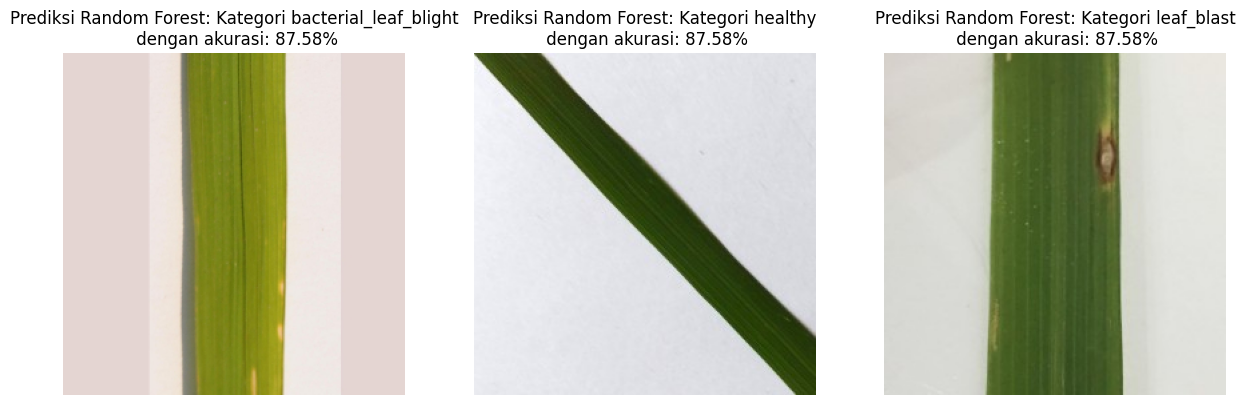

In [ ]:
#fungsi untuk memproses gambar dan mengekstraksi fitur
def process_images(images):
    features = []
    for image in images:
        # Ekstraksi fitur dari gambar
        all_features = extract_features(image)
        features.append(all_features)

    features = np.array(features)
    # Normalisasi fitur
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    return normalized_features

#unggah gambar menggunakan files.upload()
uploaded_files = files.upload()

#proses gambar yang diunggah
test_images = [cv2.imread(file_path) for file_path in uploaded_files.keys()]
test_features = process_images(test_images)

#melakukan prediksi menggunakan model yang dilatih (rf_model)
predictions = rf_model.predict(test_features)

#menghitung akurasi model
accuracy = accuracy_score(val_labels_numeric, rf_model.predict(val_features))

#menampilkan hasil prediksi bersama gambar yang diunggah
fig, axes = plt.subplots(1, len(test_images), figsize=(15, 5))

for i, (img, prediction) in enumerate(zip(test_images, predictions)):
    #menampilkan gambar di subplot
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    #menampilkan hasil prediksi sebagai judul gambar
    pred_class = label_encoder.inverse_transform([prediction])[0]
    axes[i].set_title(f"Prediksi Random Forest: Kategori {pred_class}\n dengan akurasi: {accuracy * 100:.2f}%")

#menampilkan plot
plt.show()